In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

In [2]:
args = {
    'batch_size': 20,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 5
}

In [3]:
from torchvision import datasets, transforms

In [4]:
train_set = datasets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST('./', train=False, transform=transforms.ToTensor(), download=False)

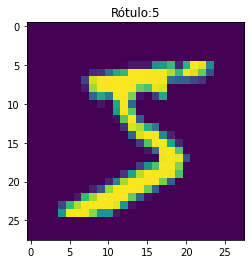

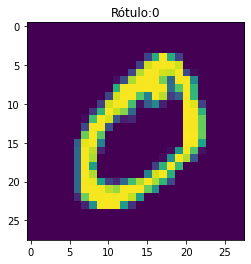

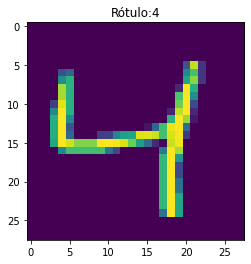

In [5]:
for i in range(3):
    dado, rotulo = train_set[i]
    
    plt.figure()
    plt.imshow(dado[0])
    plt.title("Rótulo:" + str(rotulo))

In [6]:
from torch.utils.data import DataLoader

In [7]:
train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])

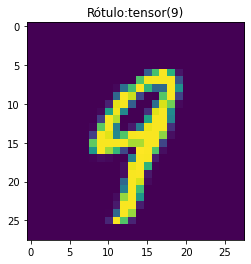

In [8]:
for batch in train_loader:
    dado, rotulo = batch
    
    plt.imshow(dado[0][0])
    plt.title("Rótulo:" + str(rotulo[0]))
    break

In [9]:
class MLP(nn.Module):
    
    def __init__(self, input_size, hidden_size, out_size):
        super(MLP, self).__init__()
        
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        
        X = X.view(X.size(0), -1)
        
        feature = self.features(X)
        output = self.softmax(self.out(feature))
        
        return output

In [10]:
input_size = 28 * 28
hidden_size = 128
out_size = 10 # número de classes

In [11]:
net = MLP(input_size, hidden_size, out_size)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [13]:
for epoch in range(args['num_epochs']):
    
    epoch_loss = []
    
    for batch in train_loader:
        
        dado, rotulo = batch
        
        # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.data)
        
        # Backward
        loss.backward()
        optimizer.step()
        
    epoch_loss = np.asarray(epoch_loss)
    print('Época %d, Loss: %.4f +\- %.4f' % (epoch, epoch_loss.mean(), epoch_loss.std()))

C:\Users\USURIO~2\AppData\Local\Temp/ipykernel_14328/302965717.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.out(feature))


Época 0, Loss: 1.7275 +\- 0.1511
Época 1, Loss: 1.6693 +\- 0.0909
Época 2, Loss: 1.7106 +\- 0.1056
Época 3, Loss: 1.7103 +\- 0.0978
Época 4, Loss: 1.7623 +\- 0.1041
